<a href="https://colab.research.google.com/github/Ferchisx/EjerciciosSyS/blob/Ejercicios/Cuaderno5/Transformada_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Descargue 10 segundos de la canción de su preferencia desde youtube, y generé un filtro pasabanda (el usuario debe poder definir las frecuencias de corte) para cada uno de los filtros descritos (el usuario también debe poder fijar los parámetros de diseño de cada filtro). Compare los resultados de los filtros estudiados en este cuaderno tipo IIR para diseño Butterworth, Chebyshev 1, Chebyshev 2, Bessel y Elíptico.

In [13]:
# @title Instalamos las librerias necesarias
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf
import pandas as pd
import matplotlib as mpl
import yt_dlp as youtube_dl
import subprocess

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.6 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl (162 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.1.0-py3-none-any.whl (104 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (142 kB)
  Using cached idna-3.4-py3-none-

In [14]:
# @title Definimos la funcion de descarga del video
def descarga(video_url,name):
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

In [15]:
# @title Ingreso de la cancion y toma de los 10 segundos
CAC = input("Ingrese el link de su cancion favorita: ")
descarga(CAC,'Cancion')

subprocess.call(['ffmpeg','-y', '-i', 'Cancion'+'.mp3',
                   'Cancion'+'.wav'])

plc = np.array([25])    # El punto de lectura de la canción ingresada será en 25 segundos
tm = 10    #segundos de muestra
fs = 48000    #frecuencia de muestreo de un video en youtube
t = np.arange(0,5,1/fs)   #vector de tiempo
XC = np.zeros((1, int(tm * fs), 2))

x, fs = sf.read('/content/Cancion.wav')
for i,ti in enumerate(plc):
  XC[i] = x[int(fs*ti):int(fs*(ti+tm)),:] #aquí se crea la muestra de 10s de la cancion ingresada

XC_1 = XC[0,:,0]

Ingrese el link de su cancion favorita: https://www.youtube.com/watch?v=kXmvE3EecfA&pp=ygUQbXkgb3JkaW5hcnkgbGlmZQ%3D%3D
[youtube] Extracting URL: https://www.youtube.com/watch?v=kXmvE3EecfA&pp=ygUQbXkgb3JkaW5hcnkgbGlmZQ%3D%3D
[youtube] kXmvE3EecfA: Downloading webpage
[youtube] kXmvE3EecfA: Downloading ios player API JSON
[youtube] kXmvE3EecfA: Downloading android player API JSON
[youtube] kXmvE3EecfA: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=kXmvE3EecfA
[youtube] kXmvE3EecfA: Downloading webpage
[youtube] kXmvE3EecfA: Downloading ios player API JSON
[youtube] kXmvE3EecfA: Downloading android player API JSON
[youtube] kXmvE3EecfA: Downloading m3u8 information
[info] kXmvE3EecfA: Downloading 1 format(s): 251
[download] Cancion.mp3 has already been downloaded
[download] 100% of    3.65MiB


In [16]:
Audio(XC_1.T,rate=fs) #Audio original

In [77]:
# @title Importe de librerias de filtros y comandos extras

from scipy.signal import butter as bw
from scipy.signal import freqz_zpk
from matplotlib.patches import Circle
from scipy.signal import cheby1
from scipy.signal import cheby2
from scipy.signal import freqz
from scipy.signal import ellip
from scipy.signal import bessel
from scipy.signal import lfilter,filtfilt

In [95]:
# @title Ingreso de funciones para las gráficas

def freq(filter_name, w, h, orden): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(orden))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()

FILTRO BUTTERWORTH

Ingrese la frecuencia de corte 1 (primera):2000
Ingrese la frecuencia de corte 2 (segunda):7000
Ingrese el orden del filtro deseado: 3


<ipython-input-95-b16669e465e6>:7: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')


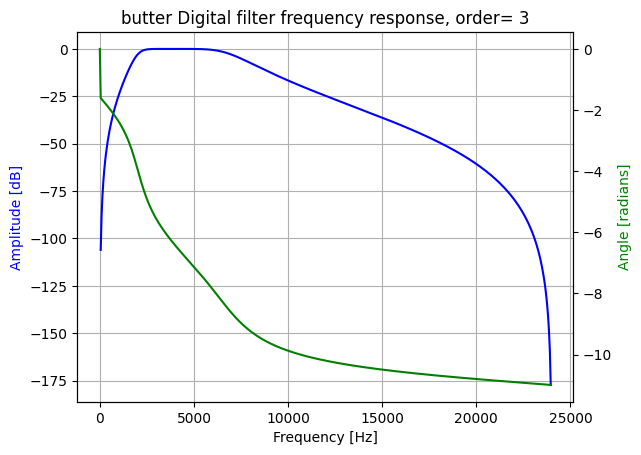

In [97]:
wc1 = int(input("Ingrese la frecuencia de corte 1 (primera):"))
wc2 = int(input("Ingrese la frecuencia de corte 2 (segunda):"))
Wn = [wc1,wc2]
filter_name='butter'
orden = int(input("Ingrese el orden del filtro deseado: "))
a, b = bw(orden,Wn,btype='bandpass',output='ba',fs=fs)
XF = filtfilt(a,b,XC_1)
w, h = freqz(a, b, fs=fs)
freq(filter_name,w,h,orden)

In [98]:
Audio(XF,rate=fs) #Audio filtrado

FILTRO CHEBYSHEV 1

Ingrese la frecuencia de corte 1 (primera):4000
Ingrese la frecuencia de corte 2 (segunda):9000
Ingrese el valor de rizado deseado: 12
Ingrese el orden del filtro deseado: 5


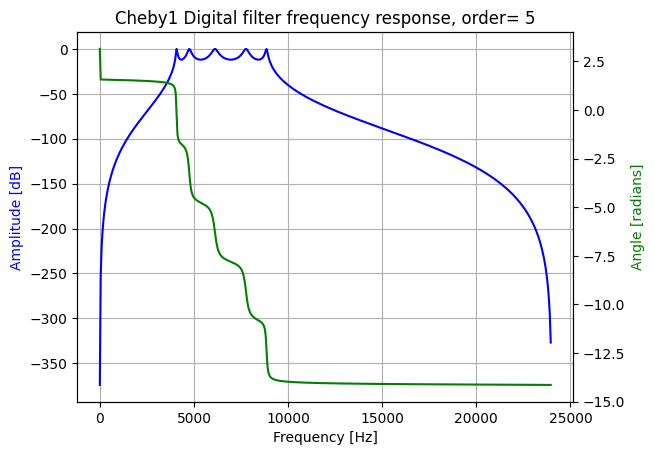

In [99]:
wc1 = int(input("Ingrese la frecuencia de corte 1 (primera):"))
wc2 = int(input("Ingrese la frecuencia de corte 2 (segunda):"))
Wn = [wc1,wc2]
filter_name='Cheby1'
riz = int(input("Ingrese el valor de rizado deseado: "))
orden = int(input("Ingrese el orden del filtro deseado: "))
a, b = cheby1(orden,riz,Wn,btype='bandpass',output='ba',fs=fs)
XF = filtfilt(a,b,XC_1)
w, h = freqz(a, b, fs=fs)
freq(filter_name,w,h,orden)

In [100]:
Audio(XF,rate=fs)

FILTRO CHEBYSHEV 2

Ingrese la frecuencia de corte 1 (primera):1000
Ingrese la frecuencia de corte 2 (segunda):3000
Ingrese el valor de rizado deseado: 25
Ingrese el orden del filtro deseado: 3


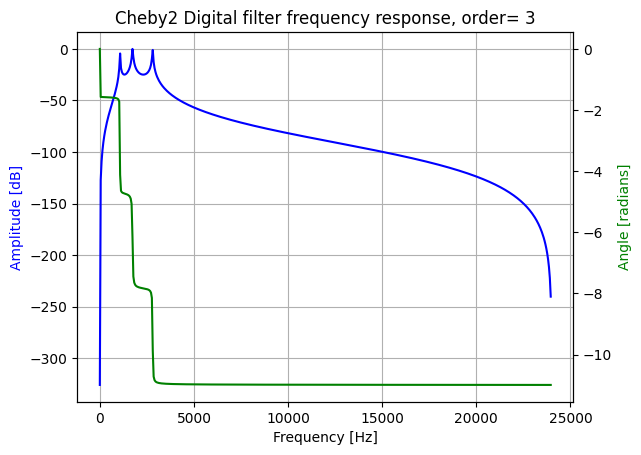

In [101]:
wc1 = int(input("Ingrese la frecuencia de corte 1 (primera):"))
wc2 = int(input("Ingrese la frecuencia de corte 2 (segunda):"))
Wn = [wc1,wc2]
filter_name='Cheby2'
riz = int(input("Ingrese el valor de rizado deseado: "))
orden = int(input("Ingrese el orden del filtro deseado: "))
a, b = cheby1(orden,riz,Wn,btype='bandpass',output='ba',fs=fs)
XF = filtfilt(a,b,XC_1)
w, h = freqz(a, b, fs=fs)
freq(filter_name,w,h,orden)

In [102]:
Audio(XF,rate=fs)

FILTRO BESSEL

FILTRO ELÍPTICO

Cada filtro tiene sus características y usos definidos, en general suele hacerse mas uso de los filtros con aproximaciones Butterworth (para mantener la señal después de una frecuencia de corte lo más estable posible) y los Chebyshev (si es necesario que el cambio en la señal sea más rápido a costas de la estabilidad).
El rizado es una respuesta del sistema que indica el "zumbido" o el ruido de la señal, para disminuir esto de manera práctica basta con aumentar el orden del filtro diseñado.



---



2. Consulte en qué consiste el método de diseño de filtros FIR por ventaneo (Ver función firwin y material de apoyo). Realice un cuadro comparativo de las ventajas y desventajas de los filtros IIR y los FIR. Nota: Recuerde que un filtro FIR utiliza solamente raíces tipo ceros, es decir que a0 = 1 , y ak = 0 para k={1,2,...}.

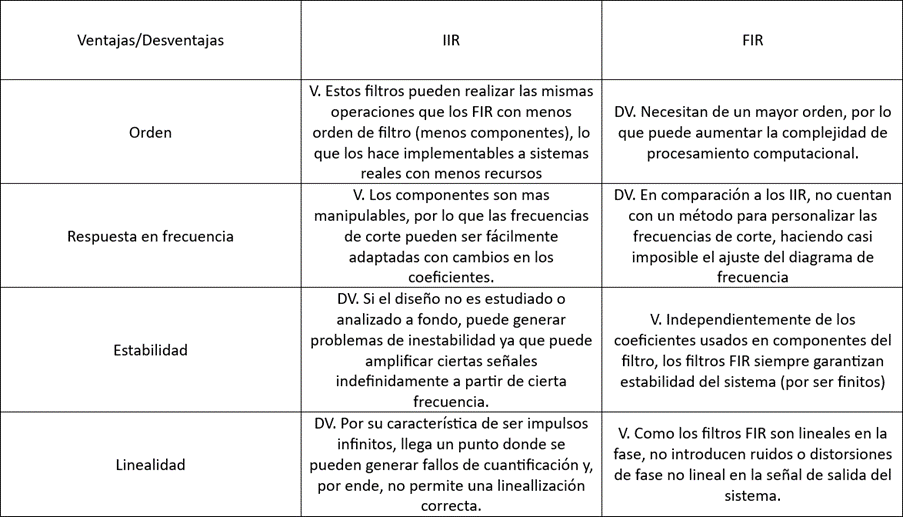



---



3. Incluya la implementación del filtro firwin en el punto 1.

In [ ]:
# @title Diseño del filtro FIR
from scipy import signal
OF = int(input("Ingrese el orden del filtro a su gusto: "))
#Se normalizan las frecuencias ingresadas por el usuario con la frecuencia de muestreo dividido entre 2
#Con esto nos aseguramos de evitar el error de que en firwin se necesita una frecuencia entre 0 y fs/2
wc1 /= fs/2.0
wc2 /= fs/2.0
zeros = signal.firwin(OF, [wc1, wc2], pass_zero=False) #El filtro FIR no cuenta con polos
w, h = signal.freqz(zeros, worN=8000)

In [ ]:
Po_Ce(zeros,0)

In [ ]:
freq('FIR', w, h, OF)